<a href="https://colab.research.google.com/github/AadarshLN/Audio-Classification-in-Carnatic-Classical-Music/blob/main/MINI_PROJECT_FINAL_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!fusermount -u drive
!google-drive-ocamlfuse drive


Mounted at /content/gdrive
fusermount: failed to unmount /content/drive: No such file or directory
/bin/bash: line 1: google-drive-ocamlfuse: command not found


In [ ]:
import librosa
import glob
import IPython.display as ipd
import numpy as np

In [ ]:
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier


audio_features = []
labels = []

for folder_path in ['/content/gdrive/MyDrive/datasets/avivadhi', '/content/gdrive/MyDrive/datasets/vivadhi']:
  pattern = '*.mp3'
  file_paths = glob.glob(f'{folder_path}/{pattern}')

  for path in file_paths:
    x, sr = librosa.load(path)
    rms = librosa.feature.rms(y=x)
    chromogram = librosa.feature.chroma_stft(y=x, sr=sr)
    sc = librosa.feature.spectral_centroid(y=x ,sr=sr)[0]
    mean_rms = np.mean(rms)
    median_chroma = np.median(chromogram.flatten())
    std_dev_sc = np.std(sc)
    audio_features.append([mean_rms, median_chroma, std_dev_sc])
    labels.append('AV' if folder_path == '/content/gdrive/MyDrive/datasets/avivadhi' else 'V')




In [ ]:
k=2
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(audio_features, labels)


KNeighborsClassifier(n_neighbors=2)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(audio_features, labels, test_size=0.2, random_state=41)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
cv_scores = cross_val_score(knn_classifier, audio_features, labels, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores)}")


Accuracy: 0.25
Confusion Matrix:
[[1 0]
 [3 0]]
Cross-validation scores: [0.75 0.5  0.5  0.5  0.75]
Mean CV accuracy: 0.6


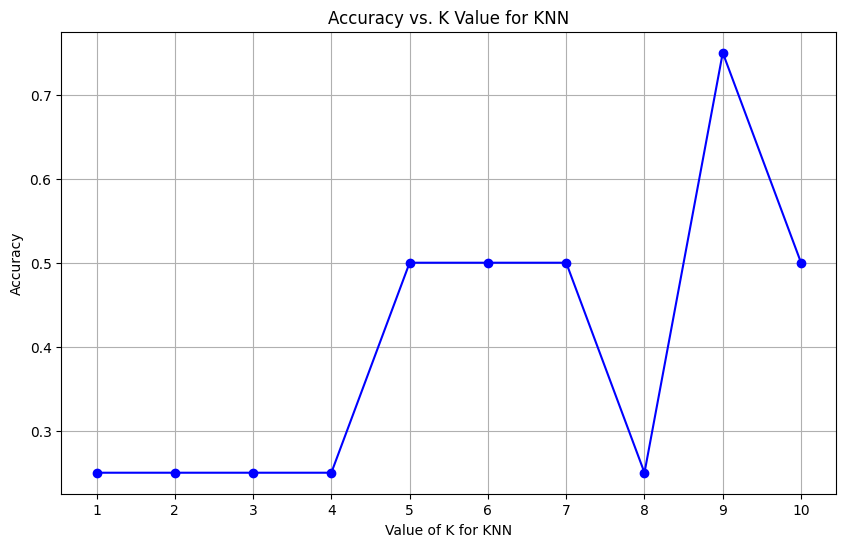

In [ ]:
import matplotlib.pyplot as plt


k_values = []
accuracy_scores = []


for k in range(1, 11):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_scores.append(accuracy)


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Value for KNN')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold

k_values = []
train_accuracy_scores = []
val_accuracy_scores = []

for k in range(1, 11):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    skf = StratifiedKFold(n_splits=5)
    temp_train_acc = []
    temp_val_acc = []
    for train_index, val_index in skf.split(audio_features, labels):
        X_train_fold, X_val_fold = [audio_features[i] for i in train_index], [audio_features[i] for i in val_index]
        y_train_fold, y_val_fold = [labels[i] for i in train_index], [labels[i] for i in val_index]
        knn_classifier.fit(X_train_fold, y_train_fold)
        y_pred_train = knn_classifier.predict(X_train_fold)
        y_pred_val = knn_classifier.predict(X_val_fold)
        temp_train_acc.append(accuracy_score(y_train_fold, y_pred_train))
        temp_val_acc.append(accuracy_score(y_val_fold, y_pred_val))

    k_values.append(k)
    train_accuracy_scores.append(np.mean(temp_train_acc))
    val_accuracy_scores.append(np.mean(temp_val_acc))

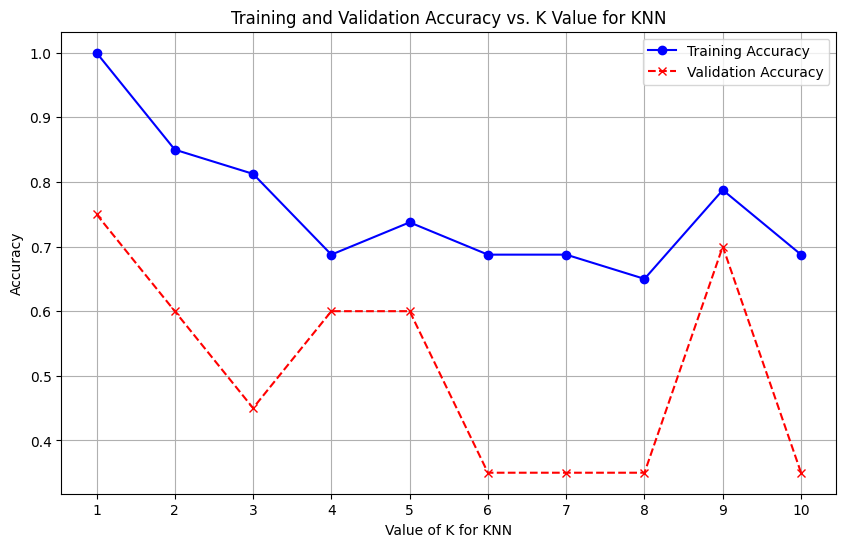

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy_scores, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(k_values, val_accuracy_scores, marker='x', linestyle='--', color='r', label='Validation Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. K Value for KNN')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()